In [130]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
import math
import time
import io
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
# ivol_sep22.csv and on
# lasep22                  is AUG 31 looking into Sep 2022 DONE 2.45   ivol2_sep22  .csv
# 2jdfoct22              is SEPT 30 looking into Oct 2022  DONE 2.8    ivol2_oct22
# looking4JDF_intonovember    is OCT looking into Nov 2022 DONE 3.73   ivol2_nov22
# lookingintoDEC22          is NOV30 looking into Dec 2022 DONE 4.08   ivol2_dec22
# lookingintoJAN23       is Dec 2022 looking into Jan 2023 DONE 4.12   ivol2_jan23
#lookingintoFEB23                    is Jan2023 into feb23 DONE 4.6    ivol2_feb23
# lookatmarfrfr23                         is Feb2023 into mar23 4.65   ivol2_mar23
ivolfiles = ['/content/drive/My Drive/ivol2_sep22.csv',
             '/content/drive/My Drive/ivol2_oct22.csv',
             '/content/drive/My Drive/ivol2_nov22.csv',
             '/content/drive/My Drive/ivol2_dec22.csv',
             '/content/drive/My Drive/ivol2_jan23.csv',
             '/content/drive/My Drive/ivol2_feb23.csv',
             '/content/drive/My Drive/ivol2_mar23.csv']
# m86weights date ticker sprc shares mktcap
Wsheet_values = [
    'aug 1',
    'sep 1',
    'oct 3',
    'nov 1',
    'dec 1',
    'jan 3',
    'feb 1']
# m86retsdata:  date ticker shareclass sprc dailyreturns
RSheet_values = [
    'aug 22',
    'sep 22',
    'oct 22',
    'nov 22',
    'dec 22',
    'jan 23',
    'feb 23']
monthcodes = [8,9,10,11,12,1,2,3]
riskfreerates = [2.45,2.8,3.73,4.08,4.12,4.6,4.65]#30d exp bond
years = [2022,2022,2022,2022,2022,2023,2023,2023]

AnalysisNumber = 0 # 0-6. 1,2,3,4,5 is done. 0 i need the figures

RFR = riskfreerates[AnalysisNumber]
monthcode = monthcodes[AnalysisNumber] # 8 = aug duh #for later portfolio looping
ivfile = ivolfiles[AnalysisNumber]
WSheet = Wsheet_values[AnalysisNumber]
RSheet = RSheet_values[AnalysisNumber]
year1 = years[AnalysisNumber]

monthcode2 = monthcodes[AnalysisNumber+1]
WSheet2 = Wsheet_values[AnalysisNumber+1]
RSheet2 = RSheet_values[AnalysisNumber+1]
year2 = years[AnalysisNumber+1]
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
from openpyxl import load_workbook
returns_data = "/content/drive/My Drive/m86retsdata.xlsx"
market_cap_data = "/content/drive/My Drive/m86weights.xlsx"
WBR = load_workbook(returns_data) # date ticker shareclass sprc dailyreturns
WBM = load_workbook(market_cap_data) # date ticker sprc shares mktcap
ivoldf = pd.read_csv(ivfile)


In [132]:
wsm = WBM[WSheet]
mktcapdata = []
for row in wsm.iter_rows(values_only=True):
    mktcapdata.append(row)
dfm = pd.DataFrame(mktcapdata[1:], columns=mktcapdata[0])
dfm = dfm.loc[:, ["date", "ticker", "sprc", "mktcap"]]
#print(dfm)
for index, row in dfm.iterrows():
    ticker = row['ticker']
    occurrences = dfm[dfm['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfm.at[index, 'ticker'] = new_ticker

#print(dfm)
dfm = dfm[~dfm['ticker'].str.endswith('_A')]
print(dfm)

          date ticker        sprc        mktcap
0   2022-08-01   ORCL   77.440002  2.063719e+08
1   2022-08-01   MSFT  278.010010  2.073369e+09
2   2022-08-01   TROW  123.419998  2.785491e+07
3   2022-08-01    HON  191.990005  1.293421e+08
4   2022-08-01    ADM   84.260002  4.741378e+07
..         ...    ...         ...           ...
516 2022-08-01     DG  252.080002  5.722140e+07
517 2022-08-01   FTNT   60.060001  4.735857e+07
518 2022-08-01   GNRC  264.989990  1.691431e+07
519 2022-08-01   CBOE  116.529999  1.237420e+07
520 2022-08-01   TSLA  891.830017  9.315075e+08

[521 rows x 4 columns]


In [133]:
wsm2 = WBM[WSheet2] # for month 2
mktcapdata = []
for row in wsm2.iter_rows(values_only=True):
    mktcapdata.append(row)
dfm2 = pd.DataFrame(mktcapdata[1:], columns=mktcapdata[0])
dfm2 = dfm2.loc[:, ["date", "ticker", "sprc", "mktcap"]]
#print(dfm2)
for index, row in dfm2.iterrows():
    ticker = row['ticker']
    occurrences = dfm2[dfm2['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfm2.at[index, 'ticker'] = new_ticker

#print(dfm2)
dfm2 = dfm2[~dfm2['ticker'].str.endswith('_A')]
print(dfm2)

          date ticker        sprc        mktcap
0   2022-09-01   ORCL   75.300003  2.006689e+08
1   2022-09-01   MSFT  260.399994  1.942035e+09
2   2022-09-01   TROW  119.000000  2.685735e+07
3   2022-09-01    HON  190.729996  1.284933e+08
4   2022-09-01    ADM   87.580002  4.909402e+07
..         ...    ...         ...           ...
516 2022-09-01     DG  242.770004  5.476212e+07
517 2022-09-01   FTNT   48.549999  3.828269e+07
518 2022-09-01   GNRC  233.009995  1.487326e+07
519 2022-09-01   CBOE  121.230003  1.285790e+07
520 2022-09-01   TSLA  277.160004  8.684726e+08

[521 rows x 4 columns]


In [134]:
wsr = WBR[RSheet]
returnsdata = []
for row in wsr.iter_rows(values_only=True):
    returnsdata.append(row)
dfr = pd.DataFrame(returnsdata[1:], columns=returnsdata[0])
dfr = dfr.loc[:, ["date", "ticker","shareclass", "sprc", "dailyreturns"]]
#print(df)
dfr = dfr[dfr['shareclass'] != 'A']
#print(dfr)
for index, row in dfr.iterrows():
    ticker = row['ticker']
    occurrences = dfr[dfr['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfr.at[index, 'ticker'] = new_ticker

#print(dfr)
dfr = dfr[~dfr['ticker'].str.endswith('_A')]
print(dfr)

            date ticker shareclass        sprc  dailyreturns
0     2022-08-01   ORCL              77.440002     -0.005139
1     2022-08-02   ORCL              76.349998     -0.014075
2     2022-08-03   ORCL              77.370003      0.013360
3     2022-08-04   ORCL              77.400002      0.000388
4     2022-08-05   ORCL              77.349998     -0.000646
...          ...    ...        ...         ...           ...
11978 2022-08-25   TSLA             296.070007     -0.003456
11979 2022-08-26   TSLA             288.089996     -0.026953
11980 2022-08-29   TSLA             284.820007     -0.011351
11981 2022-08-30   TSLA             277.700012     -0.024998
11982 2022-08-31   TSLA             275.609985     -0.007526

[11223 rows x 5 columns]


In [135]:
wsr2 = WBR[RSheet2] #for month 2
returnsdata = []
for row in wsr2.iter_rows(values_only=True):
    returnsdata.append(row)
dfr2 = pd.DataFrame(returnsdata[1:], columns=returnsdata[0])
dfr2 = dfr2.loc[:, ["date", "ticker","shareclass", "sprc", "dailyreturns"]]

dfr2 = dfr2[dfr2['shareclass'] != 'A']
#print(dfr)
for index, row in dfr2.iterrows():
    ticker = row['ticker']
    occurrences = dfr2[dfr2['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfr2.at[index, 'ticker'] = new_ticker

#print(dfr)
dfr2 = dfr2[~dfr2['ticker'].str.endswith('_A')]
print(dfr2)

            date ticker shareclass        sprc  dailyreturns
0     2022-09-01   ORCL              75.300003      0.015509
1     2022-09-02   ORCL              74.680000     -0.008234
2     2022-09-06   ORCL              73.830002     -0.011382
3     2022-09-07   ORCL              74.489998      0.008939
4     2022-09-08   ORCL              74.650002      0.002148
...          ...    ...        ...         ...           ...
10936 2022-09-26   TSLA             276.010010      0.002470
10937 2022-09-27   TSLA             282.940002      0.025108
10938 2022-09-28   TSLA             287.809998      0.017212
10939 2022-09-29   TSLA             268.209991     -0.068101
10940 2022-09-30   TSLA             265.250000     -0.011036

[10247 rows x 5 columns]


In [136]:
tickers = dfm['ticker'].unique()
# Create a dictionary to store the weights of each ticker for each portfolio
portfolio_weights = {'ticker': tickers}
for n in range(1, 501):
    top_n_tickers = dfm.nlargest(n, 'mktcap')['ticker'].tolist()
    # Calculate equal weights for each stock
    weight = 1 / n
    portfolio_weights[f'N{n}'] = [weight if ticker in top_n_tickers else 0 for ticker in tickers]
weights_df = pd.DataFrame(portfolio_weights)
# Normalize weights so that each portfolio's weights sum up to 1
weights_df.iloc[:, 1:] = weights_df.iloc[:, 1:].div(weights_df.iloc[:, 1:].sum())

print(weights_df)

    ticker   N1   N2        N3    N4   N5        N6        N7     N8  \
0     ORCL  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
1     MSFT  0.0  0.5  0.333333  0.25  0.2  0.166667  0.142857  0.125   
2     TROW  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
3      HON  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
4      ADM  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
..     ...  ...  ...       ...   ...  ...       ...       ...    ...   
510     DG  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
511   FTNT  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
512   GNRC  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
513   CBOE  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
514   TSLA  0.0  0.0  0.000000  0.25  0.2  0.166667  0.142857  0.125   

           N9  ...      N491      N492      N493      N494      N495     N496  \
0    0.000000  ...  0.002037  0.002033  0.002033  0.00

In [137]:
tickers2 = dfm2['ticker'].unique()
# Create a dictionary to store the weights of each ticker for each portfolio
portfolio_weights = {'ticker': tickers}
for n in range(1, 501):
    top_n_tickers = dfm2.nlargest(n, 'mktcap')['ticker'].tolist()
    # Calculate equal weights for each stock
    weight = 1 / n
    portfolio_weights[f'N{n}'] = [weight if ticker in top_n_tickers else 0 for ticker in tickers]
weights_df2 = pd.DataFrame(portfolio_weights)
# Normalize weights so that each portfolio's weights sum up to 1
weights_df2.iloc[:, 1:] = weights_df2.iloc[:, 1:].div(weights_df2.iloc[:, 1:].sum())

print(weights_df2)

    ticker   N1   N2        N3    N4   N5        N6        N7     N8  \
0     ORCL  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
1     MSFT  0.0  0.5  0.333333  0.25  0.2  0.166667  0.142857  0.125   
2     TROW  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
3      HON  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
4      ADM  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
..     ...  ...  ...       ...   ...  ...       ...       ...    ...   
510     DG  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
511   FTNT  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
512   GNRC  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
513   CBOE  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
514   TSLA  0.0  0.0  0.000000  0.25  0.2  0.166667  0.142857  0.125   

           N9  ...      N491      N492      N493      N494     N495      N496  \
0    0.000000  ...  0.002037  0.002033  0.002028  0.00

In [138]:
#for month 1
dfrsort = dfr.sort_values(by=['date','ticker'])
dfrsort = dfrsort.reset_index(drop=True)
print(dfrsort)
wgtsort = weights_df.sort_values(by='ticker')
wgtsort = wgtsort.reset_index(drop=True)
print(wgtsort)

#for month 2
dfrsort2 = dfr2.sort_values(by=['date','ticker'])
dfrsort2 = dfrsort2.reset_index(drop=True)
print(dfrsort2)
wgtsort2 = weights_df2.sort_values(by='ticker')
wgtsort2 = wgtsort2.reset_index(drop=True)
print(wgtsort2)

#Testing for just one date: (runs quickly lol)
# date_subset = dfrsort[dfrsort['date'] == '2022-08-01']
# print(date_subset)
# portTotals = []
# ticker_weights = {ticker: wgtsort[wgtsort['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort['ticker'].unique()}
# for column in weights_df.columns[1:]:  # Exclude the 'ticker' column
#     portTotal = 0
#     for _, row in date_subset.iterrows():
#         ticker = row['ticker']
#         if ticker in ticker_weights:
#             weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
#             add = row['dailyreturns'] * weight
#             portTotal += add

#     portTotals.append(portTotal)

# print(portTotals)

            date ticker shareclass        sprc  dailyreturns
0     2022-08-01      A             133.429993     -0.004996
1     2022-08-01    AAL              14.280000      0.041575
2     2022-08-01   AAPL             161.509995     -0.006153
3     2022-08-01   ABBV             140.220001     -0.022925
4     2022-08-01    ABT             109.519997      0.006248
...          ...    ...        ...         ...           ...
11218 2022-08-31   XRAY              32.770000     -0.005161
11219 2022-08-31    XYL              91.099998      0.000547
11220 2022-08-31    YUM             111.239998      0.004152
11221 2022-08-31    ZBH             106.320000     -0.009779
11222 2022-08-31   ZION              55.029999     -0.006679

[11223 rows x 5 columns]
    ticker   N1   N2        N3    N4   N5        N6        N7     N8  \
0        A  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
1      AAL  0.0  0.0  0.000000  0.00  0.0  0.000000  0.000000  0.000   
2     AAPL  1.0  0.5  0.33

In [139]:
#Testing for just one day
# plt.plot(portTotals, label = "S&P_N Portfolio Returns")
# plt.grid(True)
# plt.legend()
# plt.title("Portfolio Returns for each S&P N for DAY 1 ONLY of Aug2022")
# plt.xlabel("N")
# plt.ylabel("Return")
# plt.show()

In [140]:
allports = pd.DataFrame()
for i in range(1,32):
  d = f"{str(year1)}-{monthcode:02d}-{i:02d}"
  #print(d)
  try:
    date_subset = dfrsort[dfrsort['date'] == d]
    #print(date_subset)
  except KeyError:
    #print(i)
        # Skip to the next iteration if the date subset is missing
    continue
  #print(date_subset)

  portTotals = []
  ticker_weights = {ticker: wgtsort[wgtsort['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort['ticker'].unique()}
  for column in weights_df.columns[1:]:  # Exclude the 'ticker' column
      portTotal = 0
      for _, row in date_subset.iterrows():
          ticker = row['ticker']
          if ticker in ticker_weights:
              weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
              add = row['dailyreturns'] * weight
              portTotal += add

      portTotals.append(portTotal)

  #print(portTotals)
  newCol = "day"+str(i)
  allports[newCol] = portTotals
allports = allports.multiply(10)
print(allports)

         day1      day2      day3      day4      day5  day6  day7      day8  \
0   -0.061535 -0.092874  0.382477 -0.019262 -0.013871     0     0 -0.029030   
1   -0.079388 -0.103809  0.330420  0.011256 -0.019979     0     0 -0.060289   
2   -0.042057 -0.099489  0.353455  0.080373 -0.054703     0     0 -0.073100   
3   -0.030477 -0.046781  0.321730  0.070337 -0.206785     0     0 -0.035276   
4   -0.044272 -0.030150  0.307082  0.057785 -0.176364     0     0 -0.029574   
..        ...       ...       ...       ...       ...   ...   ...       ...   
495 -0.016931 -0.059432  0.090575 -0.022169  0.022271     0     0  0.031270   
496 -0.017179 -0.058488  0.091233 -0.022139  0.022583     0     0  0.031696   
497 -0.017145 -0.058370  0.091050 -0.022095  0.022538     0     0  0.031632   
498 -0.017128 -0.058082  0.090698 -0.022086  0.022556     0     0  0.031568   
499 -0.017082 -0.058070  0.091122 -0.022234  0.022099     0     0  0.031960   

         day9     day10  ...     day22     day23   

In [141]:
#month 2
allports2 = pd.DataFrame()
for i in range(1,32):
  d = f"{str(year2)}-{monthcode2:02d}-{i:02d}"
  #print(d)
  #print(d)
  try:
    date_subset = dfrsort2[dfrsort2['date'] == d]
    #print(date_subset)
  except KeyError:
    #print(i)
        # Skip to the next iteration if the date subset is missing
    continue
  #print(date_subset)

  portTotals = []
  ticker_weights = {ticker: wgtsort2[wgtsort2['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort2['ticker'].unique()}
  for column in weights_df2.columns[1:]:  # Exclude the 'ticker' column
      portTotal = 0
      for _, row in date_subset.iterrows():
          ticker = row['ticker']
          if ticker in ticker_weights:
              weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
              add = row['dailyreturns'] * weight
              portTotal += add

      portTotals.append(portTotal)

  #print(portTotals)
  newCol = "day"+str(i)
  allports2[newCol] = portTotals
allports2 = allports2.multiply(10)
print(allports2)

         day1      day2  day3  day4  day5      day6      day7      day8  \
0    0.047068 -0.136111     0     0     0 -0.082151  0.092539 -0.096179   
1    0.003073 -0.151389     0     0     0 -0.095946  0.141827 -0.039759   
2    0.029658 -0.109010     0     0     0 -0.100562  0.183627 -0.017753   
3    0.036303 -0.144447     0     0     0 -0.036470  0.222262  0.035681   
4    0.054695 -0.149389     0     0     0 -0.051259  0.233634  0.009356   
..        ...       ...   ...   ...   ...       ...       ...       ...   
495  0.007790 -0.065526     0     0     0 -0.025299  0.211598  0.086213   
496  0.007680 -0.065435     0     0     0 -0.025269  0.211484  0.085893   
497  0.007665 -0.065303     0     0     0 -0.025218  0.211059  0.085720   
498  0.007684 -0.065138     0     0     0 -0.025758  0.211006  0.085478   
499  0.007129 -0.065027     0     0     0 -0.026019  0.210832  0.085522   

         day9  day10  ...     day22     day23  day24  day25     day26  \
0    0.188398      0  ... 

In [142]:
#print(dfrsort)
#print(dfrsort2)

In [143]:
#print(dfrsort.head(-10)) #date ticker price etc.
grouped_df = dfrsort.groupby(['ticker', 'date']).agg({'sprc': 'mean'}).reset_index()
pivot_df = grouped_df.pivot(index='ticker', columns='date', values='sprc')
pivot_df.reset_index(inplace=True)
df3 = pivot_df.copy()
df3.set_index("ticker", inplace=True)
df3.rename(columns={"date": "ticker"}, inplace=True)
#print(df3.head(10))
#print(df3.shape[0])  # Check the number of rows in df3
df3t = df3.transpose()
#print("yeeho1")

ticker_weights_N500 = wgtsort.set_index('ticker')['N500']
# Sort the ticker columns of df3t DataFrame based on the weights in N500 column
df3t = df3t.reindex(columns=ticker_weights_N500.sort_values(ascending=False).index)
# Display the reordered DataFrame
#print(df3t)

#print("yeeho2")

#print(df3t.head(10))
cov3 = df3t.cov()
cov3 = cov3.fillna(0)
print(cov3)

ticker          A       NEE        NVDA        NUE       NTRS      NTAP  \
ticker                                                                    
A       12.301424  3.416236   25.743827   3.867096   5.921856  2.289886   
NEE      3.416236  3.212988    9.935837   5.548847   3.896793  1.733839   
NVDA    25.743827  9.935837  142.376106   7.797888  26.775915  2.993670   
NUE      3.867096  5.548847    7.797888  13.956593   5.577673  4.696100   
NTRS     5.921856  3.896793   26.775915   5.577673   7.776481  1.449764   
...           ...       ...         ...        ...        ...       ...   
WABC     3.311785  1.723543   13.240433   2.334596   3.321563  0.710205   
LEE      0.267378  0.209264   -1.038193   0.289094   0.034214  0.071896   
WW       1.009944  0.285876    7.132103  -0.021107   1.335966 -0.013181   
CAL      3.352509  2.557282    6.949202   4.046988   3.540309  1.219089   
ATI      1.763442  2.987942   -8.728670   7.227797   1.060874  2.681397   

ticker        NSC       

In [144]:
#now replace cov diagonals with IV^2 data:
ticker_to_iv = dict(zip(ivoldf['Ticker Symbol'], ivoldf['BS_IV']))

# Iterate over the diagonal elements of the covariance matrix
for ticker in cov3.index:
    if ticker in ticker_to_iv:
        # Replace the diagonal element with the corresponding BS_IV value
        cov3.at[ticker, ticker] = ((ticker_to_iv[ticker])**2 )*100

print(cov3)

ticker          A       NEE       NVDA        NUE       NTRS      NTAP  \
ticker                                                                   
A        9.625390  3.416236  25.743827   3.867096   5.921856  2.289886   
NEE      3.416236  7.536538   9.935837   5.548847   3.896793  1.733839   
NVDA    25.743827  9.935837  32.342458   7.797888  26.775915  2.993670   
NUE      3.867096  5.548847   7.797888  20.779735   5.577673  4.696100   
NTRS     5.921856  3.896793  26.775915   5.577673   6.371313  1.449764   
...           ...       ...        ...        ...        ...       ...   
WABC     3.311785  1.723543  13.240433   2.334596   3.321563  0.710205   
LEE      0.267378  0.209264  -1.038193   0.289094   0.034214  0.071896   
WW       1.009944  0.285876   7.132103  -0.021107   1.335966 -0.013181   
CAL      3.352509  2.557282   6.949202   4.046988   3.540309  1.219089   
ATI      1.763442  2.987942  -8.728670   7.227797   1.060874  2.681397   

ticker        NSC       NRG         N

In [145]:
#print(weights_df[weights_df['ticker'] == 'AAPL'])
wgtsort_sorted = wgtsort.sort_values(by='N500', ascending=False) #by marketcap, indirectly by N500 weighting, for mult with covar matrix
#print(wgtsort_sorted)
wgtssT = wgtsort_sorted.T
#print(wgtssT) # w.T

ivports = []
for i in range(1,501):
  #print(i)
  s1 = np.matmul(wgtssT.iloc[i].to_numpy(),cov3.to_numpy())
  s2 = np.matmul(s1,wgtsort_sorted.iloc[:, i])
  ivports.append(s2)

#print(ivports) #N=1,2,3...500
#print(step2) yay
#print(step1)
#print(wgtsort_sorted.iloc[0]) #ticker is just the index and doesnt count. 0th column is N1

In [146]:
# plt.plot(ivports)
# plt.grid(True)
# plt.legend()
# plt.title("IV of N=[1,500] Portfolio")
# plt.xlabel("N")
# plt.ylabel("IV")
# plt.show()

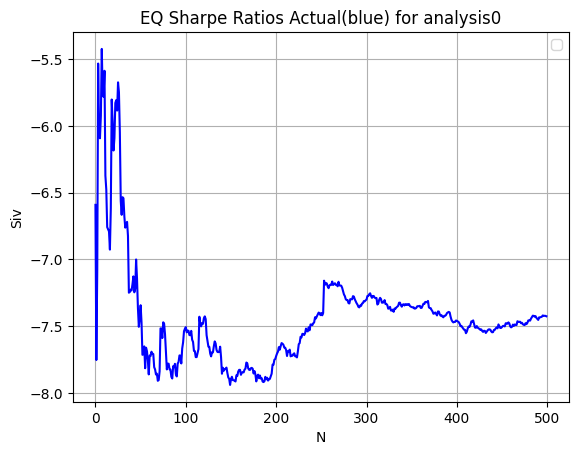

In [147]:
#sum returns for each portfolio:
port_returns_actual1 = allports.sum(axis=1).tolist() # r1    returns for month 1 (ie: Aug returns if predicting for Sep)
stdev1 = allports.std(axis=1).tolist() # SD1    for month 1

#ivports   = IV ports looking into month2:    #using Stock/Port weights of month 1
port_returns_actual2 = allports2.sum(axis=1).tolist() # r2 month 2 (ie: Sep returns if predicting for Sep)
stdev2 = allports2.std(axis=1).tolist()


#print(port_returns_actual1)
#Siv3 = [(x - (RFR)) / y for x, y in zip(port_returns_actual1, stdevaug)]
Siv2 = [(x - (RFR/100)) / y for x, y in zip(port_returns_actual1, ivports)]
Sact2 = [(x - (RFR/100)) / y for x, y in zip(port_returns_actual2, stdev2)]

#plt.plot(Siv2, color='red')
plt.plot(Sact2, color='blue')
plt.grid(True)
plt.legend()
plt.title("EQ Sharpe Ratios Actual(blue) for analysis"+str(AnalysisNumber))
plt.xlabel("N")
plt.ylabel("Siv")
plt.show()

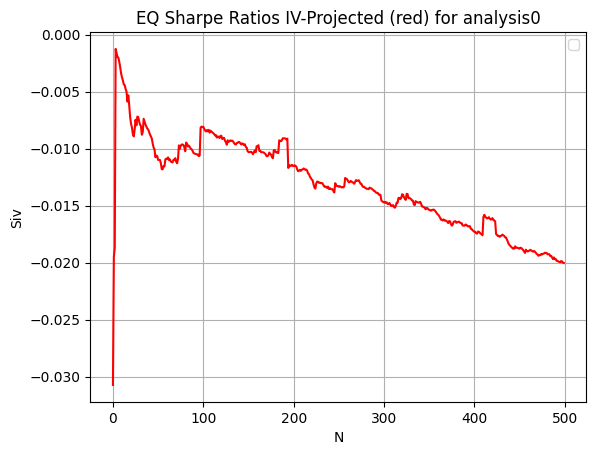

In [148]:
plt.plot(Siv2, color='red')
#plt.plot(Sact2, color='blue')
plt.grid(True)
plt.legend()
plt.title("EQ Sharpe Ratios IV-Projected (red) for analysis"+str(AnalysisNumber))
plt.xlabel("N")
plt.ylabel("Siv")
plt.show()

In [149]:
rankSiv2 = sorted(range(len(Siv2)), key=lambda i: Siv2[i], reverse=True)
print(rankSiv2)
rankSact2 = sorted(range(len(Sact2)), key=lambda i: Sact2[i], reverse=True)
print(rankSact2)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 16, 18, 27, 19, 28, 34, 25, 29, 35, 20, 36, 30, 26, 31, 98, 37, 100, 99, 21, 97, 38, 101, 39, 106, 24, 104, 102, 108, 105, 103, 109, 40, 33, 110, 107, 111, 22, 112, 41, 32, 114, 113, 119, 120, 42, 23, 116, 117, 115, 123, 118, 188, 122, 189, 43, 190, 191, 193, 121, 192, 187, 127, 184, 130, 185, 132, 124, 131, 129, 186, 133, 128, 139, 140, 125, 81, 138, 134, 137, 143, 141, 44, 82, 144, 135, 146, 77, 136, 142, 76, 126, 145, 78, 161, 73, 84, 75, 160, 159, 83, 147, 85, 79, 45, 148, 86, 74, 87, 46, 179, 178, 157, 88, 163, 162, 80, 149, 153, 180, 152, 182, 150, 156, 151, 165, 158, 164, 166, 173, 181, 167, 89, 154, 183, 168, 90, 91, 174, 92, 155, 169, 94, 93, 175, 172, 96, 48, 49, 171, 170, 95, 176, 47, 61, 69, 177, 59, 60, 72, 58, 63, 67, 68, 51, 50, 52, 62, 64, 70, 65, 66, 53, 71, 198, 195, 201, 197, 202, 199, 200, 56, 196, 57, 203, 194, 211, 54, 212, 55, 210, 214, 204, 207, 213, 209, 206, 215, 208, 205, 216, 217, 218, 257, 219, 258, 259, 220

In [150]:
rankdf = pd.DataFrame()
rankdf['Siv'] = rankSiv2
rankdf['Sact'] = rankSact2
rankdf['ivports'] = ivports
rankdf['stdev2'] = stdev2
#take predicted best N portfolio, and get the actual returns for that portfolio
bestNpred = rankSiv2[0]
#print( allports2.iloc[bestNpred-1].values)
act4best = pd.DataFrame()
act4best['returns'] = allports2.iloc[bestNpred-1].values
print(rankdf)
print(act4best)



     Siv  Sact     ivports    stdev2
0      3     7   10.169182  0.190549
1      4     3   25.683806  0.155019
2      5    10   28.508076  0.165398
3      6    25  459.809362  0.173129
4      7    26  362.976864  0.167600
..   ...   ...         ...       ...
495  494   178   13.894672  0.119193
496  495   155   13.842369  0.119226
497  498   185   13.786793  0.118986
498  499   186   13.740781  0.119022
499    0   149   13.692891  0.118978

[500 rows x 4 columns]
     returns
0   0.029658
1  -0.109010
2   0.000000
3   0.000000
4   0.000000
5  -0.100562
6   0.183627
7  -0.017753
8   0.227973
9   0.000000
10  0.000000
11  0.235501
12 -0.614111
13  0.080365
14 -0.212359
15 -0.117818
16  0.000000
17  0.000000
18  0.111105
19 -0.042047
20 -0.215250
21 -0.027520
22 -0.193044
23  0.000000
24  0.000000
25  0.041085
26 -0.014133
27  0.128419
28 -0.303764
29 -0.216957
30  0.000000


In [151]:
text = 'EQrank'+str(AnalysisNumber)
file = '/content/drive/My Drive/'
ext = '.csv'
rankdf.to_csv(file+text+ext, index=False)

text = 'EQact4best'+str(AnalysisNumber)
file = '/content/drive/My Drive/'
ext = '.csv'
act4best.to_csv(file+text+ext, index=False)